In [21]:
import pandas as pd
import numpy as np

#img load
from PIL import Image
import requests

#img preprocessing
from keras.preprocessing import image
from keras.applications import mobilenet_v2

load link dataframes

In [22]:
img_link_df = pd.read_pickle('attractions_img_links_df.pkl')
att_loc_df = pd.read_pickle('attractions_loc_df.pkl')

In [23]:
small_df = img_link_df.dropna()
len(small_df)

1233

In [24]:
def prepare_image(url):
    im = loadImage(url)
#     im = Image.open(requests.get(url, stream=True).raw)
#     im = im.resize((224, 224), Image.ANTIALIAS)
    x = image.img_to_array(im)
    x = np.expand_dims(x, axis=0)
    x = mobilenet_v2.preprocess_input(x)
    return x

In [25]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(url):
    
    img = Image.open(requests.get(url, stream=True).raw)
    imgplot = plt.imshow(img)
    plt.show()

Populating the interactive namespace from numpy and matplotlib


In [33]:
from io import BytesIO

def loadImage(URL):
    response = requests.get(URL) #timeout=5, verify=False, headers={'connection': 'close'})
    image_io = BytesIO(response.content)
    img = image.load_img(image_io, target_size=(224, 224))


    return img

In [35]:
attraction = 1111
pic = 23
url = small_df.iloc[attraction][pic]
print(small_df.iloc[[attraction]].index)

# This is all we need to load and use the full pretrained model!
model = mobilenet_v2.MobileNetV2(weights='imagenet',)

x = prepare_image(url)

out = model.predict(x)

df = pd.DataFrame(columns = ['prediction', 'probability'])
predictions = mobilenet_v2.decode_predictions(out)[0]
idx = 0
for x in predictions:
    df = df.append(pd.DataFrame({'prediction':x[1], 'probability': x[2]}, index=[idx]), ignore_index=True)
    idx = idx + 1

print(df)

Index(['Virginia Capitol Building'], dtype='object')
    prediction  probability
0      cuirass     0.360367
1       throne     0.146063
2  breastplate     0.092085
3   chain_mail     0.039995
4    overskirt     0.032243


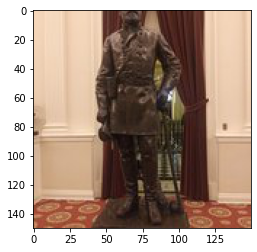

In [28]:
show_image(url)